In [240]:

import pandas as pd
import numpy as np
import csv
import datetime as dt
import matplotlib.pyplot as plt

#Etract Data from CAC 40 (Kaggle DataSet)

download_path = r"C:\Users\kelvi\Downloads\archive\preprocessed_CAC40.csv"
data = pd.read_csv(download_path, parse_dates=['Date'])
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
List_Company = list(set(data['Name']))
Date_Time = list(set(data['Date']))

#Definition of usefull functions

def specific_data(company, Initial_Date, End_Date):
    
    company_data = data[data['Name'] == company]
    final_data = company_data[(company_data['Date'] > Initial_Date) & (company_data['Date'] < End_Date)]
    return final_data


def specific_logreturn(company, Initial_Date, End_Date):
    
    Prices=specific_data(company, Initial_Date, End_Date)['Closing_Price']
    LogPrice = np.log(Prices)
    LReturn = pd.DataFrame(LogPrice.diff().dropna())
    LReturn.rename(columns={'Closing_Price': 'log_returns'}, inplace=True)
    
    LReturn = LReturn.reset_index(drop=True)
    LReturn.index = LReturn.index + 1
    return LReturn

def VaR(returns,threshold):
    
    VAR = -np.percentile(returns,100-(100*threshold))
    
    return VAR
    
    
def Expected_Shortfall(returns,VaR):
    ES=0
    n=0
    for j in range(len(Portfolio_R)):
        if Portfolio_R[j]<-VaR:
            ES = ES + Portfolio_R[j]
            n=n+1
    return ES/n
            
    
    


In [385]:
# Create a table with Closing Prices for each company
closing_price_table = data.pivot(index='Date', columns='Name', values='Closing_Price')

# Display the table with Closing Prices


# Compute the Log Return for each company
log_returns_table = closing_price_table.apply(lambda x: np.log(x / x.shift(1)))

# Display the table with Log Returns
log_returns_table = log_returns_table.iloc[1:]
log_returns_table = log_returns_table.fillna(0)


log_returns_table


Name,AXA,Accor,Air Liquide,Airbus,ArcelorMittal,Atos,BNP Paribas,Bouygues,Cap Gemini,Crédit Agricole,...,Sanofi,Schneider Electric,Société Générale (Societe Generale,Sodexo,TOTAL,Unibail-Rodamco,VINCI,Veolia Environnement,Vivendi,Worldline SA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.015285,-0.004021,-0.007875,-0.007158,-0.001239,0.025418,0.001221,0.011138,0.014428,0.021987,...,-0.016658,0.005120,-0.001317,0.010687,0.000826,0.012747,0.014007,0.005381,0.000000,0.000000
2010-01-06,0.008713,-0.006467,-0.010078,0.010718,0.000275,0.039454,0.001393,0.017455,0.024467,0.005880,...,-0.007354,-0.009775,0.000000,0.058493,0.000825,0.001298,0.007177,0.016852,-0.005639,0.000000
2010-01-07,-0.011635,-0.015941,0.000000,0.012010,0.008772,-0.003333,0.018112,0.002509,-0.005255,-0.020360,...,0.009496,-0.007890,0.022795,-0.013700,0.003019,0.006788,0.006636,0.011803,-0.002359,0.000000
2010-01-08,0.004670,0.006571,0.003500,0.009783,0.013015,0.006656,0.021142,-0.005863,0.000878,0.005222,...,-0.005185,-0.008451,0.023965,0.003624,-0.004945,-0.008737,0.012900,0.042958,-0.017632,0.000000
2010-01-11,-0.007013,-0.004513,-0.008381,0.004856,-0.018763,-0.008326,-0.011277,0.004471,0.002629,-0.008218,...,0.003757,0.015850,-0.005674,-0.027627,0.009866,0.008414,0.015597,0.003325,0.001441,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30,0.004509,-0.051413,0.047008,-0.106123,-0.052805,0.000000,-0.046120,-0.037214,0.002581,0.006283,...,0.035268,-0.013066,-0.054204,-0.059930,0.038636,-0.079667,-0.003641,0.051055,-0.016880,-0.006509
2020-03-31,0.014040,-0.000800,0.021611,-0.035172,0.063513,-0.011647,-0.046134,-0.029223,0.020914,-0.005583,...,-0.004963,-0.039727,-0.015666,0.026642,0.013339,0.014328,0.055130,-0.030112,0.068444,0.000000
2020-04-01,-0.056041,-0.047931,-0.004811,-0.121551,-0.049737,-0.019054,-0.037584,-0.081702,-0.068146,-0.043625,...,-0.021117,-0.028833,-0.076540,-0.045722,0.031592,-0.010878,-0.112883,-0.005195,0.032293,-0.032616


the Expected Returns on the Equally Weighted Portfolio is :  0.00011207441081308107
the Volatility on the Equally Weighted Portfolio is :  0.011191586547984375
Skewness of the returns:  -1.3505621462880624
Kurtosis of the returns:  15.200012882727744
Daily VaR at 0.99 % is:  0.03214808559828366
Expected Shortfall :  -0.05031219939888927


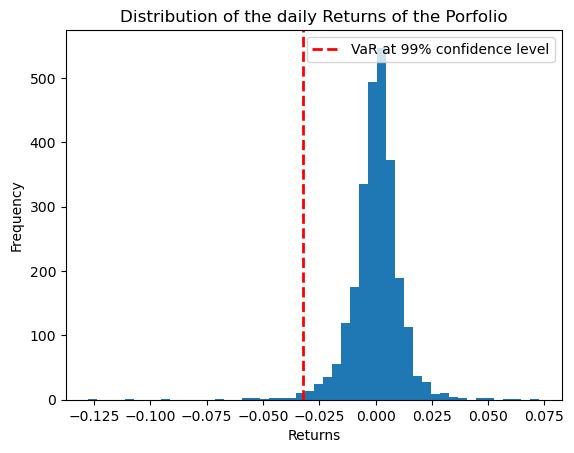

<function matplotlib.pyplot.show(close=None, block=None)>

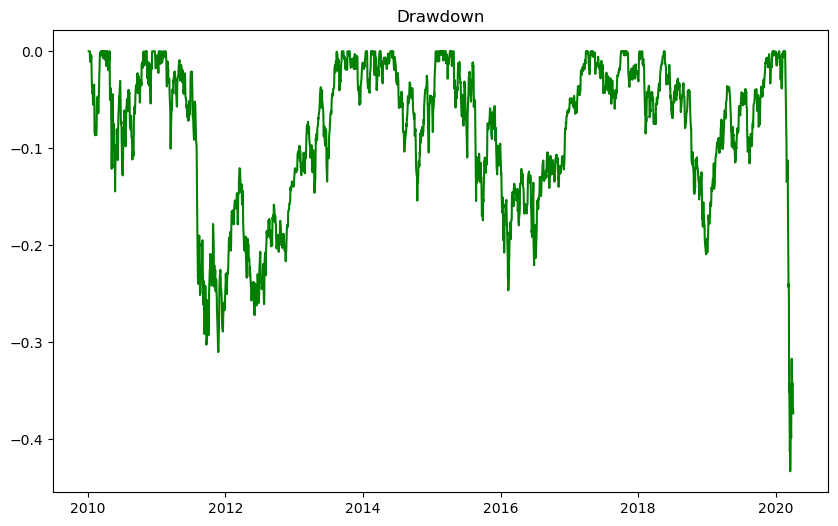

In [386]:
#Construction of The Equally Weighted Portfolio :
Portfolio_R = log_returns_table.mean(axis=1)
Portfolio_Mean = Portfolio_R.mean()
Portfolio_STD = np.std(Portfolio_R)

print("the Expected Returns on the Equally Weighted Portfolio is : ",Portfolio_Mean)
print("the Volatility on the Equally Weighted Portfolio is : ",Portfolio_STD)

#Risk Analysis of this Portfolio
from scipy.stats import skew
from scipy.stats import kurtosis

confidence_interval = 0.99

print('Skewness of the returns: ',skew(Portfolio_R))
print('Kurtosis of the returns: ',kurtosis(Portfolio_R))
print('Daily VaR at',confidence_interval,'% is: ',calculate_VaR(Portfolio_R,confidence_interval))
print('Expected Shortfall : ',Expected_Shortfall(Portfolio_R,calculate_VaR(Portfolio_R,confidence_interval)))

plt.hist(Portfolio_R,bins = 50)
plt.title('Distribution of the daily Returns of the Porfolio')
plt.ylabel('Frequency')
plt.xlabel('Returns')
plt.axvline(-calculate_VaR(Portfolio_R,confidence_interval), color='red', linestyle='dashed',linewidth = 2, label = f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()


#Drawndown plot
cumulative_port_R = (1+Portfolio_R).cumprod()
cumulative_max = cumulative_port_R.cummax()

drawdown = (cumulative_port_R - cumulative_max)/cumulative_max
plt.figure(figsize=(10,6))
plt.plot(drawdown, color='green', label = 'Drawndown')
plt.title('Drawdown')
plt.show



the Expected Returns on the GMV Portfolio is :  0.0002814904252994638
the Volatility on the GMV Portfolio is :  0.007671137694033386
Skewness of the returns:  -0.851322591230746
Kurtosis of the returns:  8.851353973845058
Daily VaR at 0.99 % is:  0.02003247646717821
Expected Shortfall :  -0.03186096882989085


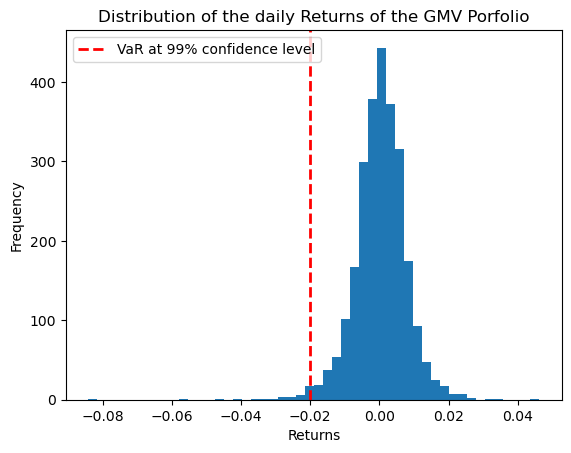

<function matplotlib.pyplot.show(close=None, block=None)>

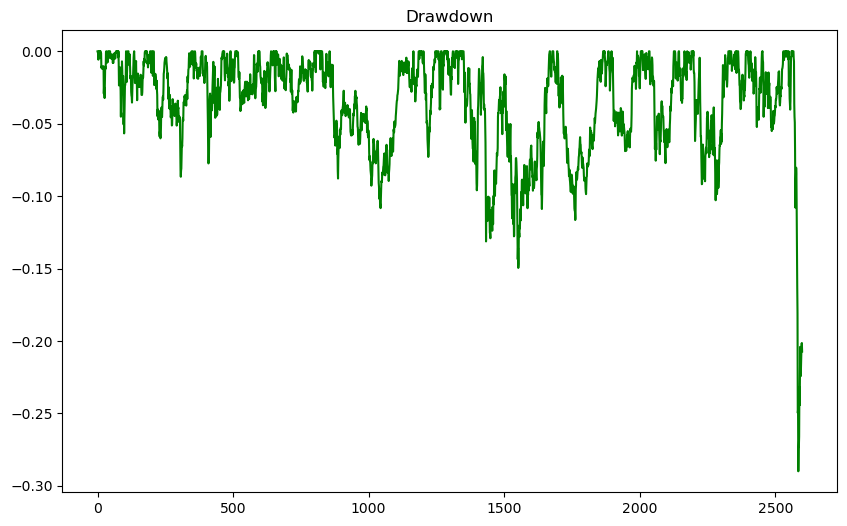

In [389]:
#Construction GMV Portfolio

#Weight Computation

Matrix_Correlation = np.cov(log_returns_table, rowvar=False)
Matrix_Correlation_Inv = np.linalg.inv(Matrix_Correlation)

Vect_Id = np.ones(38)
W_GMV = np.dot(Matrix_Correlation_Inv, Vect_Id)/sum(np.dot(Matrix_Correlation_Inv, Vect_Id))

matrice_log_returns = log_returns_table.to_numpy()
GMV_Return = np.dot(matrice_log_returns,W_GMV)

#Expected Returns and volatility

Expected_R_G = np.dot(W_GMV,log_returns_table.mean())
Volatility_G = np.sqrt(np.dot(W_GMV,np.dot(Matrix_Correlation,W_GMV)))

print("the Expected Returns on the GMV Portfolio is : ",Expected_R_G)
print("the Volatility on the GMV Portfolio is : ",Volatility_G)

#Risk Analysis of this Portfolio

print('Skewness of the returns: ',skew(GMV_Return))
print('Kurtosis of the returns: ',kurtosis(GMV_Return))
print('Daily VaR at',confidence_interval,'% is: ',calculate_VaR(GMV_Return,confidence_interval))
print('Expected Shortfall : ',Expected_Shortfall(GMV_Return,calculate_VaR(GMV_Return,confidence_interval)))

plt.hist(GMV_Return,bins = 50)
plt.title('Distribution of the daily Returns of the GMV Porfolio')
plt.ylabel('Frequency')
plt.xlabel('Returns')
plt.axvline(-calculate_VaR(GMV_Return,confidence_interval), color='red', linestyle='dashed',linewidth = 2, label = f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

#Drawndown plot
cumulative_port_R = (1+GMV_Return).cumprod()
cumulative_max = np.maximum.accumulate(cumulative_port_R)

drawdown = (cumulative_port_R - cumulative_max)/cumulative_max
plt.figure(figsize=(10,6))
plt.plot(drawdown, color='green', label = 'Drawndown')
plt.title('Drawdown')
plt.show





the Expected Returns on the MRR Portfolio is :  0.003119575747444703
the Volatility on the MRR Portfolio is :  0.025537344330961546
Skewness of the returns:  0.36174510059041404
Kurtosis of the returns:  5.519519785484414
Daily VaR at 0.99 % is:  0.0584857431043995
Expected Shortfall :  -0.09139352175030789


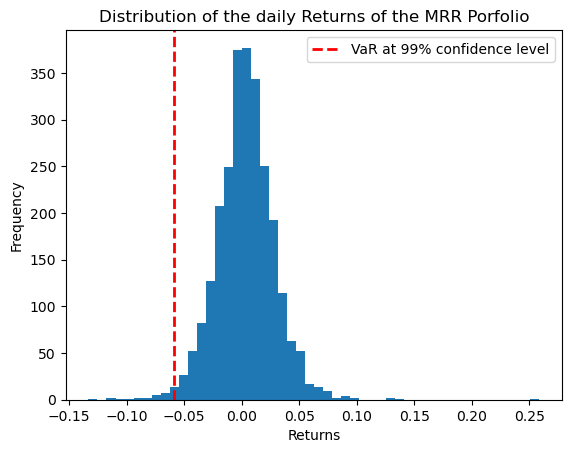

<function matplotlib.pyplot.show(close=None, block=None)>

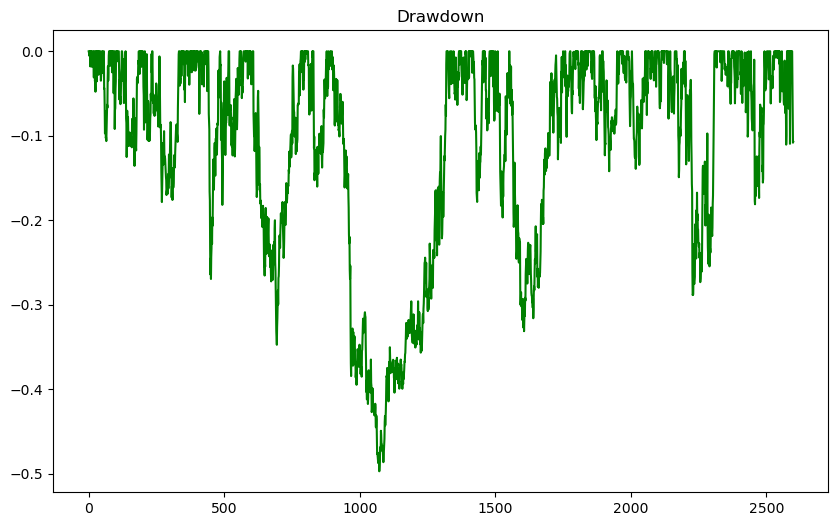

In [390]:
#Construction of the MRR Portfolio
W_MRR = np.dot(Matrix_Correlation_Inv,log_returns_table.mean())/(np.sum(np.dot(Matrix_Correlation_Inv,log_returns_table.mean())))
MRR_Return = np.dot(matrice_log_returns,W_MRR)

#Expected Returns and volatility

Expected_R_MRR = np.dot(W_MRR,log_returns_table.mean())
Volatility_MRR = np.sqrt(np.dot(W_MRR,np.dot(Matrix_Correlation,W_MRR)))

print("the Expected Returns on the MRR Portfolio is : ",Expected_R_MRR)
print("the Volatility on the MRR Portfolio is : ",Volatility_MRR)

#Risk Analysis of this Portfolio

print('Skewness of the returns: ',skew(MRR_Return))
print('Kurtosis of the returns: ',kurtosis(MRR_Return))
print('Daily VaR at',confidence_interval,'% is: ',calculate_VaR(MRR_Return,confidence_interval))
print('Expected Shortfall : ',Expected_Shortfall(MRR_Return,calculate_VaR(MRR_Return,confidence_interval)))

plt.hist(MRR_Return,bins = 50)
plt.title('Distribution of the daily Returns of the MRR Porfolio')
plt.ylabel('Frequency')
plt.xlabel('Returns')
plt.axvline(-calculate_VaR(MRR_Return,confidence_interval), color='red', linestyle='dashed',linewidth = 2, label = f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

#Drawndown plot
cumulative_port_R = (1+MRR_Return).cumprod()
cumulative_max = np.maximum.accumulate(cumulative_port_R)

drawdown = (cumulative_port_R - cumulative_max)/cumulative_max
plt.figure(figsize=(10,6))
plt.plot(drawdown, color='green', label = 'Drawndown')
plt.title('Drawdown')
plt.show



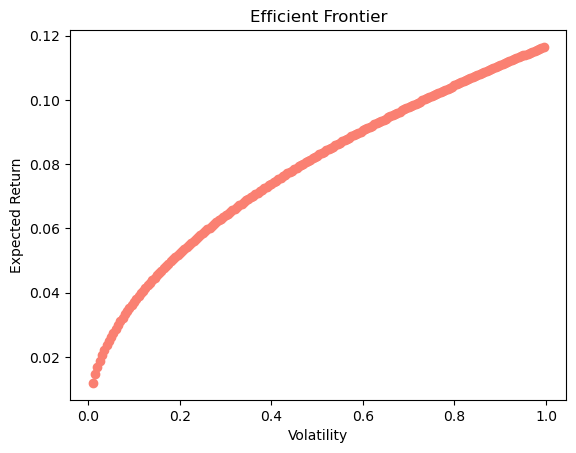

In [391]:
#Construction of the Efficient Portfolio in the Mean-Variance Theory

#Weight Computation

Risk_Aversion = 10
x=(Expected_R_MRR/(Risk_Aversion*Volatility_MRR**2))
W_opti = x * W_MRR + (1-x) * W_GMV

Expected_R_Opti = np.dot(W_opti,log_returns_table.mean())
Volatility_Opti = np.sqrt(np.dot(W_opti,np.dot(Matrix_Correlation,W_opti)))

#Efficient Frontier

import numpy as np
import matplotlib.pyplot as plt


Volatility_Change = np.arange(0.01, 1, 0.005)

z = (Expected_R_MRR - Expected_R_G) / np.sqrt(Volatility_MRR**2 - Volatility_G**2)

# Calculate the Efficient Frontier
Expected_R_Change = Expected_R_G + z * np.sqrt(Volatility_Change - Volatility_G**2)

# Plot the Efficient Frontier
plt.scatter(Volatility_Change, Expected_R_Change, color='salmon')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.show()

In [402]:
#Research Factors
#data set : https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
import pandas_datareader.data as reader
start = dt.date(2010,1,5)
end=dt.date(2020,4,3)
adress = r'C:\Users\kelvi\Downloads\F-F_Research_Data_Factors_daily_CSV\F-F_Research_Data_Factors_daily.CSV'
fama_french =reader.DataReader('F-F_Research_Data_Factors_daily','famafrench',start,end)[0]
fama_french


C:\Users\kelvi\AppData\Local\Temp\ipykernel_10124\3521274385.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  fama_french =reader.DataReader('F-F_Research_Data_Factors_daily','famafrench',start,end)[0]


,Mkt-RF,SMB,HML,RF
Date,,,,
2010-01-05,0.31,-0.64,1.24,0.000
2010-01-06,0.13,-0.22,0.57,0.000
2010-01-07,0.40,0.09,0.98,0.000
2010-01-08,0.33,0.37,0.01,0.000
2010-01-11,0.13,-0.13,-0.25,0.000
...,...,...,...,...
2020-03-30,3.16,-0.29,-2.09,0.006
2020-03-31,-1.44,1.80,-0.39,0.006
2020-04-01,-4.51,-1.48,-1.40,0.000


In [451]:
import yfinance as yf
start = dt.date(2010,1,4)

CAC40 = yf.download('^FCHI',start=start,end=end)['Adj Close']
CAC40 = pd.DataFrame(CAC40)


[*********************100%%**********************]  1 of 1 completed


In [452]:
#Computation Log_Return
CAC40=CAC40.pct_change()
CAC40 = CAC40.iloc[1:]
CAC40.rename(columns={'Adj Close' : 'Returns'}, inplace= True)



In [453]:
merge = pd.merge(CAC40,fama_french, on ='Date')
merge[['Mkt-RF','SMB','HML','RF']]=merge[['Mkt-RF','SMB','HML','RF']]/100
merge

,Returns,Mkt-RF,SMB,HML,RF
Date,,,,,
2010-01-05,-0.000264,0.0031,-0.0064,0.0124,0.00000
2010-01-06,0.001186,0.0013,-0.0022,0.0057,0.00000
2010-01-07,0.001775,0.0040,0.0009,0.0098,0.00000
2010-01-08,0.005054,0.0033,0.0037,0.0001,0.00000
2010-01-11,-0.000507,0.0013,-0.0013,-0.0025,0.00000
...,...,...,...,...,...
2020-03-27,-0.042277,-0.0348,-0.0083,-0.0076,0.00006
2020-03-30,0.006209,0.0316,-0.0029,-0.0209,0.00006
2020-03-31,0.004022,-0.0144,0.0180,-0.0039,0.00006


In [454]:
merge['Excess Returns'] = merge['Returns']-merge['RF']
merge

,Returns,Mkt-RF,SMB,HML,RF,Excess Returns
Date,,,,,,
2010-01-05,-0.000264,0.0031,-0.0064,0.0124,0.00000,-0.000264
2010-01-06,0.001186,0.0013,-0.0022,0.0057,0.00000,0.001186
2010-01-07,0.001775,0.0040,0.0009,0.0098,0.00000,0.001775
2010-01-08,0.005054,0.0033,0.0037,0.0001,0.00000,0.005054
2010-01-11,-0.000507,0.0013,-0.0013,-0.0025,0.00000,-0.000507
...,...,...,...,...,...,...
2020-03-27,-0.042277,-0.0348,-0.0083,-0.0076,0.00006,-0.042337
2020-03-30,0.006209,0.0316,-0.0029,-0.0209,0.00006,0.006149
2020-03-31,0.004022,-0.0144,0.0180,-0.0039,0.00006,0.003962


In [456]:
#Regress CAC40 on Market Factor (CAPM)
import statsmodels.api as sm

In [458]:
y = merge['Excess Returns']
X = merge['Mkt-RF']
X_c = sm.add_constant(X)
model = sm.OLS(y,X_c)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Excess Returns   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1871.
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          4.83e-307
Time:                        20:53:38   Log-Likelihood:                 8171.8
No. Observations:                2552   AIC:                        -1.634e+04
Df Residuals:                    2550   BIC:                        -1.633e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -1.294      0.196      -0.001       0.000
Mkt-RF         0.7682      0.018     43.255      0.000       0.733       0.803
==============================================================================
Omnibus:                      294.857   Durbin-Watson:                   2.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2807.944
Skew:                           0.060   Prob(JB):                         0.00
Kurtosis:                       8.137   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see the Market Factor as a really important explanatory power over the excess return of the CAC40 since R² = 0.423 and the Beta  = 0.7682 . 
Moreover the alpha is not significant at 5% which allows us to conclude that CAPM holds in this data set.

Let's try to see if we can do even better with the three factors.

In [460]:
y = merge['Excess Returns']
X = merge[['Mkt-RF','SMB','HML']]
X_c = sm.add_constant(X)
model = sm.OLS(y, X_c)
result= model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Excess Returns   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     642.9
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          3.90e-311
Time:                        21:01:55   Log-Likelihood:                 8188.8
No. Observations:                2552   AIC:                        -1.637e+04
Df Residuals:                    2548   BIC:                        -1.635e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -1.036      0.300      -0.001       0.000
Mkt-RF         0.7456      0.019     39.945      0.000       0.709       0.782
SMB            0.0023      0.037      0.063      0.950      -0.070       0.075
HML            0.2146      0.037      5.825      0.000       0.142       0.287
==============================================================================
Omnibus:                      305.262   Durbin-Watson:                   2.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3071.614
Skew:                           0.065   Prob(JB):                         0.00
Kurtosis:                       8.373   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the result is a bit better since the Adjusted R² of the 3-Factors model is greater than the Adjusted R² of the 1-Factor Model.
We still have a great explanatory power from the Market factor but we also have explanatory power from the HML (Value Stock - Growth Stock).
Here again the alpha is not significant.

TRADING STRATEGY

[*********************100%%**********************]  1 of 1 completed


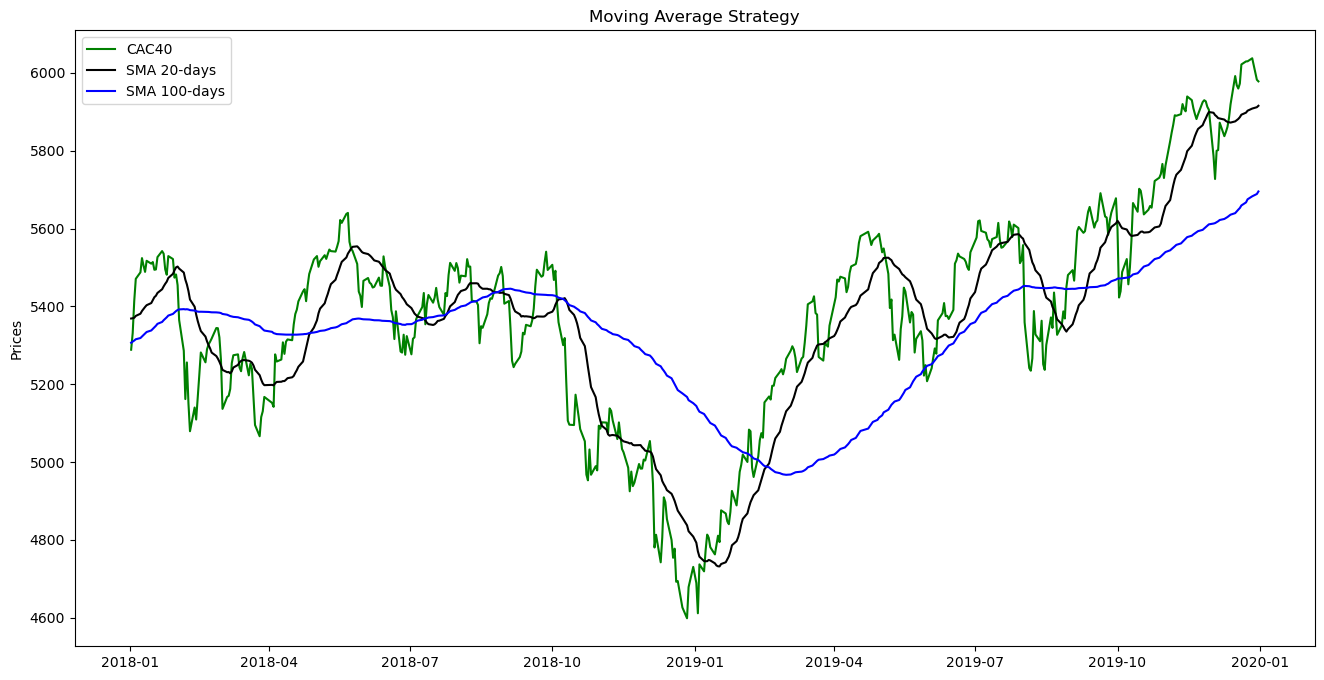

In [481]:
#Moving Average Strategy

CAC40 = yf.download('^FCHI',start=start,end=end)['Adj Close']
CAC40 = pd.DataFrame(CAC40)

#Calculating the short-window simple moving average
ma_short = CAC40.rolling(window=20).mean()

#Calculating the Long-window simple moving average

ma_long = CAC40.rolling(window=100).mean()

start_date = '2018-01-01'
end_date = '2019-12-31'
plt.figure(figsize = (16,8))
plt.plot(CAC40.loc[start_date:end_date,:].index, CAC40.loc[start_date:end_date,:], color = 'green',label='CAC40')
plt.plot(ma_short.loc[start_date:end_date,:].index,ma_short.loc[start_date:end_date,:], color='black', label='SMA 20-days')
plt.plot(ma_long.loc[start_date:end_date,:].index,ma_long.loc[start_date:end_date,:], color = 'blue',label = 'SMA 100-days')
plt.title('Moving Average Strategy')
plt.ylabel('Prices')
plt.legend()
plt.show()

The main issue with this strategy is that we have a delay of 20/2= 10 days which can significantly affect our return so to reduce this delay let's use the Exponential Moving Average .

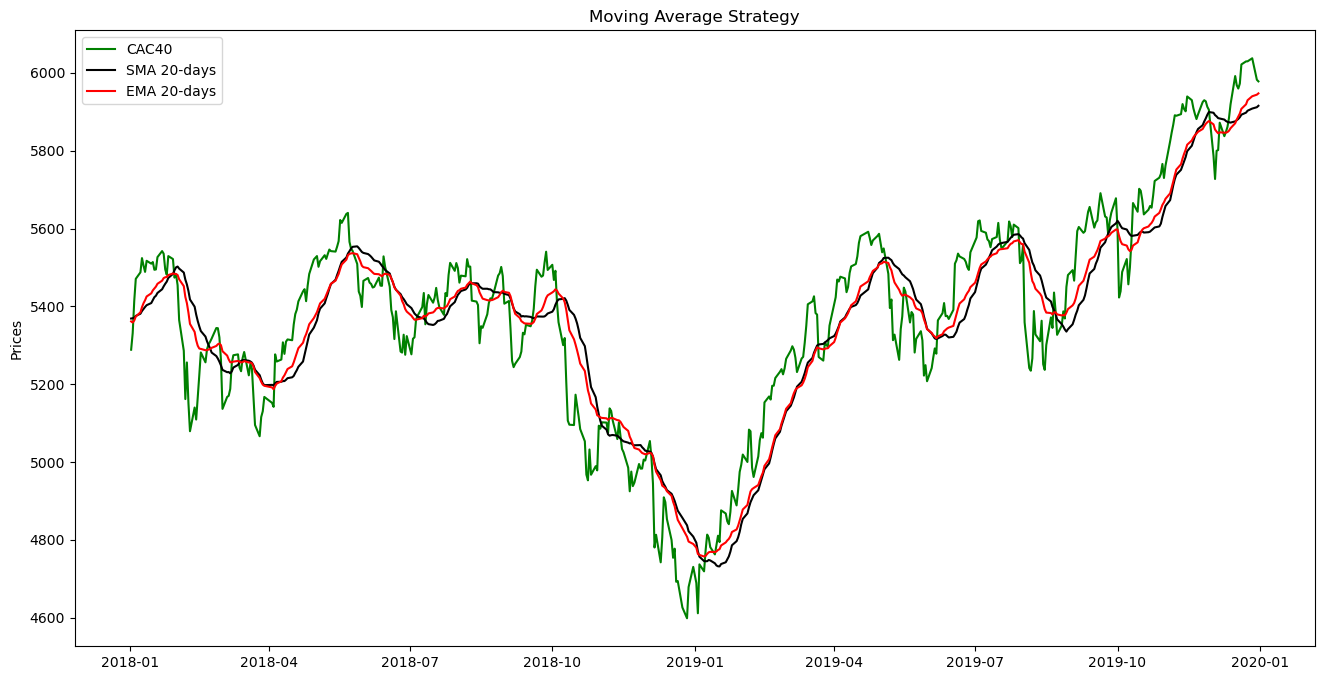

In [482]:
#Exponential Moving Average (EMA)
ema_short = CAC40.ewm(span = 20, adjust=False).mean()

plt.figure(figsize = (16,8))
plt.plot(CAC40.loc[start_date:end_date,:].index, CAC40.loc[start_date:end_date,:], color = 'green',label='CAC40')
plt.plot(ma_short.loc[start_date:end_date,:].index,ma_short.loc[start_date:end_date,:], color='black', label='SMA 20-days')
plt.plot(ema_short.loc[start_date:end_date,:].index,ema_short.loc[start_date:end_date,:], color = 'red',label = 'EMA 20-days')
plt.title('Moving Average Strategy')
plt.ylabel('Prices')
plt.legend()
plt.show()

What we can observe is that when a long term in change in price of the CAC40 occurs, the actual price is reacting faster than the EMA. Therefore we can use the following trading strategy:

1-When the Price crosses the EMA from below we close our short position to go long.

2- When the Price crosses the EMA from above we close our long position to go short

In [489]:
#Computing the difference between Prices and EMA

trade_position_raw= CAC40 - ema_short

#taking the sign of the difference to have trading signals

trade_position = trade_position_raw.apply(np.sign)

#Laging our position of one day since the EMA and the price obviously cross on the first day

trade_position_final = trade_position.shift(1)


,Adj Close
Date,
2010-01-04,NaN
2010-01-05,0.0
2010-01-06,-1.0
2010-01-07,1.0
2010-01-08,1.0
...,...
2020-03-27,-1.0
2020-03-30,-1.0
2020-03-31,-1.0


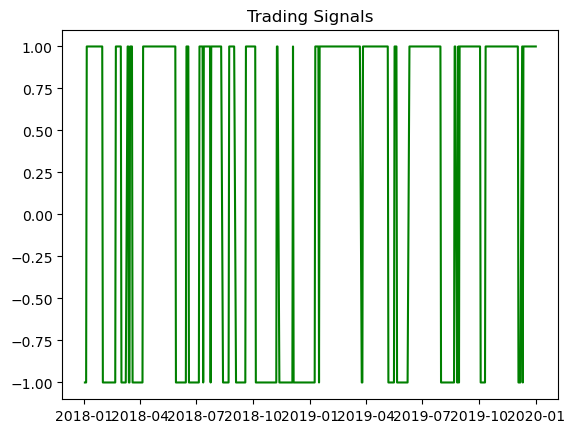

In [492]:
plt.plot(trade_position_final.loc[start_date:end_date:,].index,trade_position_final.loc[start_date:end_date],color='green')
plt.title('Trading Signals')
plt.show()

In [513]:
#
#Computation Log_Return of CAC40
CAC40 = yf.download('^FCHI',start=start,end=end)['Adj Close']
CAC40_LReturn = np.log(CAC40).diff()
CAC40_LReturn = pd.DataFrame(CAC40_LReturn)
CAC40_LReturn=CAC40_LReturn.iloc[1:]
CAC40_LReturn



[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2010-01-05,-0.000264
2010-01-06,0.001185
2010-01-07,0.001773
2010-01-08,0.005041
2010-01-11,-0.000507
...,...
2020-03-27,-0.043197
2020-03-30,0.006190
2020-03-31,0.004014


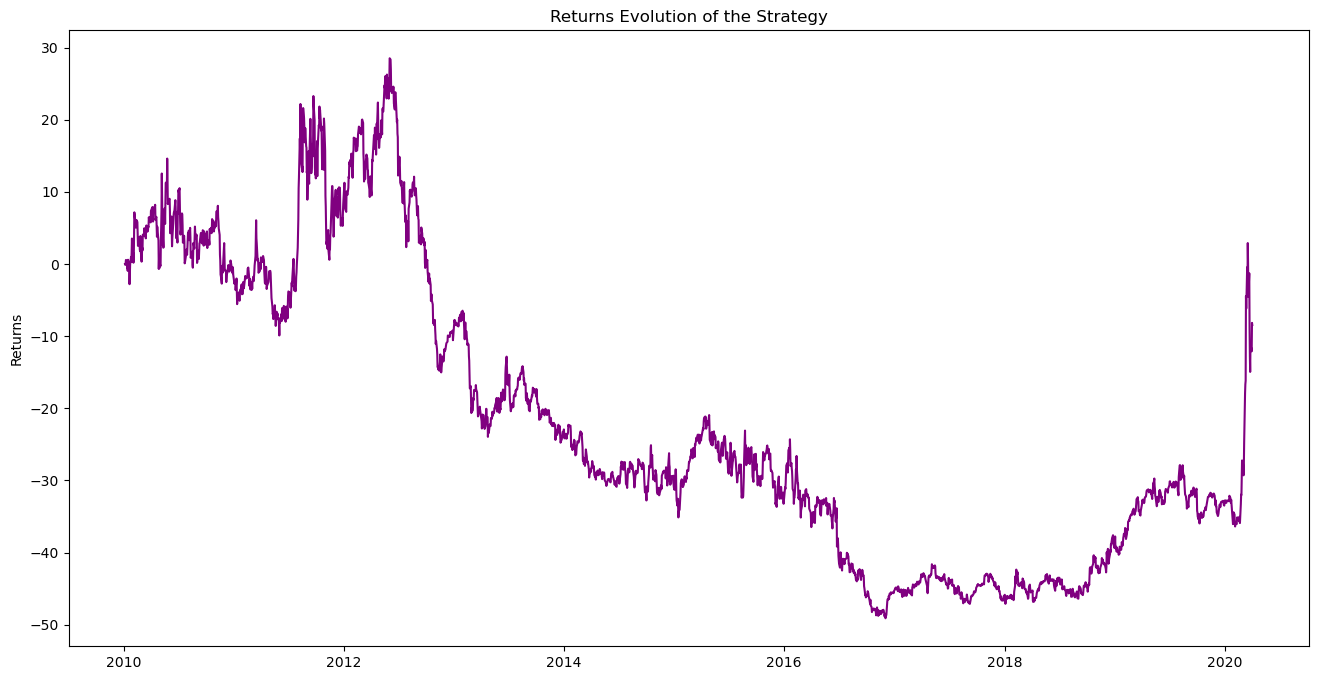

The final return of our portfolio is :  -8.45396679479049 %


In [590]:
#Compute the log returns of this strategy
log_return_strategy = trade_position_final * CAC40_LReturn

#cumulative log return

cum_log_return_strategy = log_return_strategy.cumsum()

#take the relative return

relative_return_strategy =np.exp(cum_log_return_strategy)-1

for i in CAC40_LReturn:
    plt.figure(figsize=(16,8))
    plt.plot(relative_return_strategy.index,100*relative_return_strategy[i],color='purple')
    
plt.title('Returns Evolution of the Strategy')
plt.ylabel('Returns')
plt.show()
print('The final return of our portfolio is : ',relative_return_strategy['Adj Close'].iloc[-1]*100,'%')

In [544]:
#Markovian Trading Strategy
CAC40 = yf.download('^FCHI',start='2000-01-01',end='2024-01-01')['Adj Close']
CAC40=pd.DataFrame(CAC40)
CAC40['Daily Returns']= CAC40['Adj Close'].pct_change()
CAC40=CAC40.iloc[1:]
CAC40

[*********************100%%**********************]  1 of 1 completed


,Adj Close,Daily Returns
Date,,
2000-01-04,5672.020020,-0.041463
2000-01-05,5479.700195,-0.033907
2000-01-06,5450.109863,-0.005400
2000-01-07,5539.609863,0.016422
2000-01-10,5646.120117,0.019227
...,...,...
2023-12-21,7571.399902,-0.001586
2023-12-22,7568.819824,-0.000341
2023-12-27,7571.819824,0.000396


In [546]:
CAC40['State']=np.where(CAC40['Daily Returns'] > 0 , 'up' , 'down')
CAC40

,Adj Close,Daily Returns,State
Date,,,
2000-01-04,5672.020020,-0.041463,down
2000-01-05,5479.700195,-0.033907,down
2000-01-06,5450.109863,-0.005400,down
2000-01-07,5539.609863,0.016422,up
2000-01-10,5646.120117,0.019227,up
...,...,...,...
2023-12-21,7571.399902,-0.001586,down
2023-12-22,7568.819824,-0.000341,down
2023-12-27,7571.819824,0.000396,up


In [560]:
#Defining a function to compute any probability of any sequence of up or down

def consecutive_probabilities(df,event_sequence):
    event_column=df['State']
    
    state_list = event_column.tolist()
    target_count = sum(state_list[i:i+len(event_sequence)] == event_sequence for i in range(len(state_list)-len(event_sequence)+1))
    
    first_event_count = state_list.count(event_sequence[0])
        
    probability = target_count / first_event_count if first_event_count > 0 else 0
    
    return probability

#Defining the Transition Matrix when n = 2

Transition_Matrix = pd.DataFrame({
        "up" : [compute_consecutive_probabilities(CAC40, ['up', 'up']),compute_consecutive_probabilities(CAC40, ['down', 'up'])],
        "down": [compute_consecutive_probabilities(CAC40, ['up', 'down']),compute_consecutive_probabilities(CAC40, ['down', 'down'])]},
        index = ["up","down"])

Transition_Matrix

0.46493594066082267


,up,down
up,0.498895,0.500789
down,0.535064,0.464936


In this matrix we don't observe significantly high probability of occurence for those sequence.
So let's try other sequence !


In [577]:
# Probability of having a up day after 5 down days :

print(100*len(CAC40[(CAC40['State']=='up')&(CAC40['State'].shift(-1)=='down')&(CAC40['State'].shift(-2)=='down')&(CAC40['State'].shift(-3)=='down')&(CAC40['State'].shift(-4)=='down')&(CAC40['State'].shift(-5)=='down')])/ len(CAC40[(CAC40['State'].shift(1)=='down')&(CAC40['State'].shift(2)=='down')&(CAC40['State'].shift(3)=='down')&(CAC40['State'].shift(4)=='down')&(CAC40['State'].shift(5)=='down')]),'%')

61.666666666666664 %


[*********************100%%**********************]  1 of 1 completed


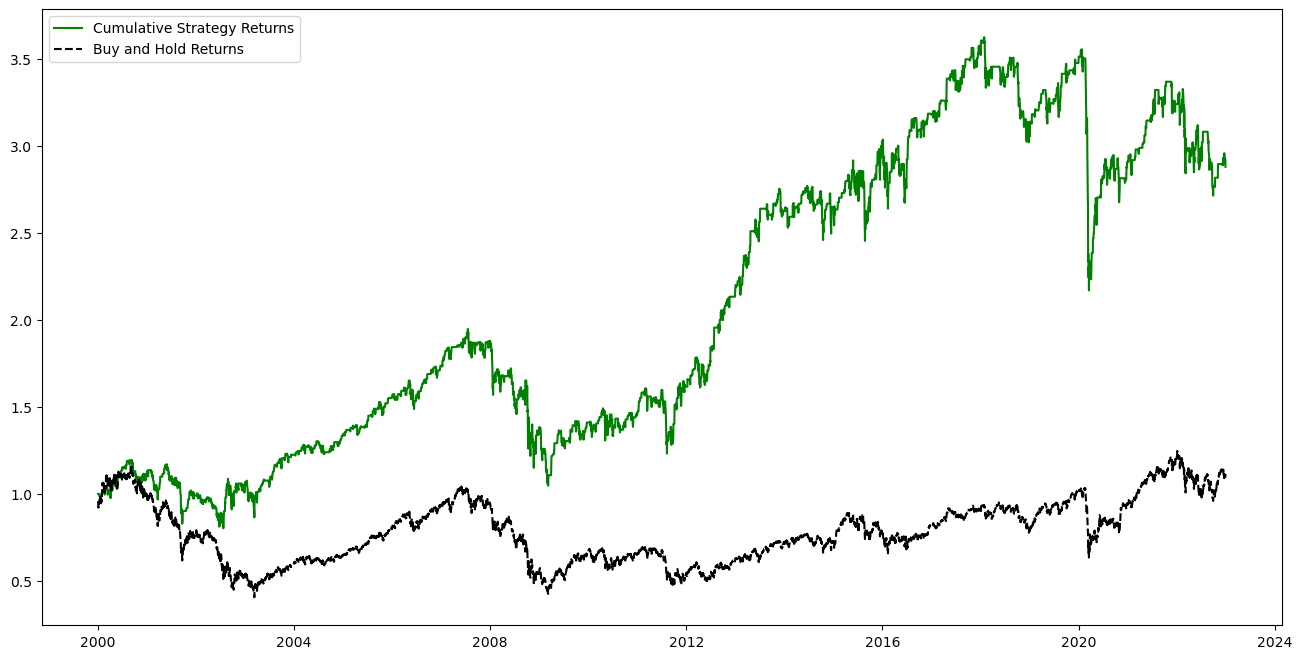

Initial Portfolio Value: $1000000.00
Final Portfolio Value (Strategy): $2878176.14
Final Portfolio Value (Buy and Hold): $1094026.51


In [592]:
#Implement a strategy that buy stocks after five consecutive days of down

def get_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

def backtest_strategy(stock_data, initial_portfolio_value):
    signals = pd.DataFrame(index=stock_data.index)
    signals['signal'] = 0

    signals['signal'][stock_data['Close'].pct_change().rolling(5).sum() < 0] = 1

    stock_data['daily_returns'] = stock_data['Close'].pct_change()

    signals['strategy_returns'] = signals['signal'].shift(1) * stock_data['daily_returns']

    signals['cumulative_strategy_returns'] = (1 + signals['strategy_returns']).cumprod()

    # Calculate final portfolio value
    final_portfolio_value = initial_portfolio_value * signals['cumulative_strategy_returns'].iloc[-1]

    return signals, final_portfolio_value

def buy_and_hold(stock_data, initial_portfolio_value):
    stock_data['daily_returns'] = stock_data['Close'].pct_change()

    # Calculate cumulative returns for buy and hold
    stock_data['cumulative_returns'] = (1 + stock_data['daily_returns']).cumprod()

    # Calculate final portfolio value for buy and hold
    final_portfolio_value_bh = initial_portfolio_value * stock_data['cumulative_returns'].iloc[-1]

    return final_portfolio_value_bh

def run_backtest(initial_portfolio_value):
    symbol = '^FCHI'
    start_date = '2000-01-01'
    end_date = '2023-01-01'

    stock_data = get_stock_data(symbol, start_date, end_date)

    signals, final_portfolio_value = backtest_strategy(stock_data, initial_portfolio_value)
    final_portfolio_value_bh = buy_and_hold(stock_data, initial_portfolio_value)

    # Plot the results
    plt.figure(figsize=(16, 8))
    plt.plot(signals['cumulative_strategy_returns'], label='Cumulative Strategy Returns',color='green')
    plt.plot(stock_data['cumulative_returns'], label='Buy and Hold Returns', linestyle='--', color='black')
    plt.legend()
    plt.show()

    print(f"Initial Portfolio Value: ${initial_portfolio_value:.2f}")
    print(f"Final Portfolio Value (Strategy): ${final_portfolio_value:.2f}")
    print(f"Final Portfolio Value (Buy and Hold): ${final_portfolio_value_bh:.2f}")

if __name__ == "__main__":
    initial_portfolio_value = 1000000  # Set your initial portfolio value here
    run_backtest(initial_portfolio_value)

